In [ ]:
using Plots
using JSON
using DataFrames

default(framestyle=:box)

In [ ]:
function load_step_metrics(name)
    data = JSON.parsefile("../logs/$name.json")
    DataFrame(data["step_metrics"])
end

## Profile GPU kernel

Row,active_ped_count,time_calc_state,time_calc_state_kernel,time_spawn
,Any,Any,Any,Any
1,44,0.0028551,8.2944e-5,0.0003688


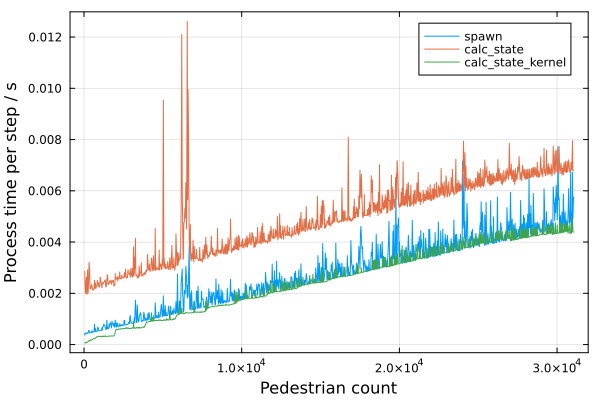

In [92]:
df = load_step_metrics("gpu_spawn")

display(first(df))

plot(xlabel="Pedestrian count", ylabel="Process time per step / s")
plot!(df.active_ped_count, [df.time_spawn, df.time_calc_state, df.time_calc_state_kernel], labels=["spawn" "calc_state" "calc_state_kernel"])

In [ ]:
savefig("output/profile_gpu_kernel.svg");

## Evaluate performance between backends

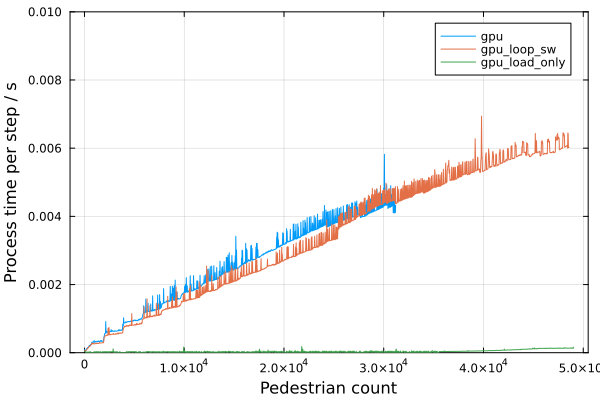

In [89]:
items = ["gpu", "gpu_loop_sw", "gpu_load_only"]

plot(xlabel="Pedestrian count", ylabel="Process time per step / s", ylim=[0.0, 0.01])

for item in items
    df = load_step_metrics(item)
    plot!(df.active_ped_count, df.time_calc_state_kernel, label=item)
end

plot!()

In [ ]:
savefig("output/performance_comparison.svg");